FI 8090

Final Project Group 1

Akintola Adesomoju, Elisa Lage Modesto Alcofra, Prashant Kumar

In [1]:
import numpy as np 
import pandas as pd
import csv
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math

import numpy as np
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from yahoofinancials import YahooFinancials

import csv

import seaborn as seabornInstance 
import statsmodels.api as sm
from statsmodels import regression

import statsmodels.formula.api as smf
from scipy import stats

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import numpy as np  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf


import matplotlib as mpl 
from sklearn.tree import export_graphviz 
import graphviz


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c


<ipython-input-1-4f26f8cae7c9>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#Loading one of the data files we have to showcase Tesla sales growth
df = pd.read_csv('TSLA.csv')

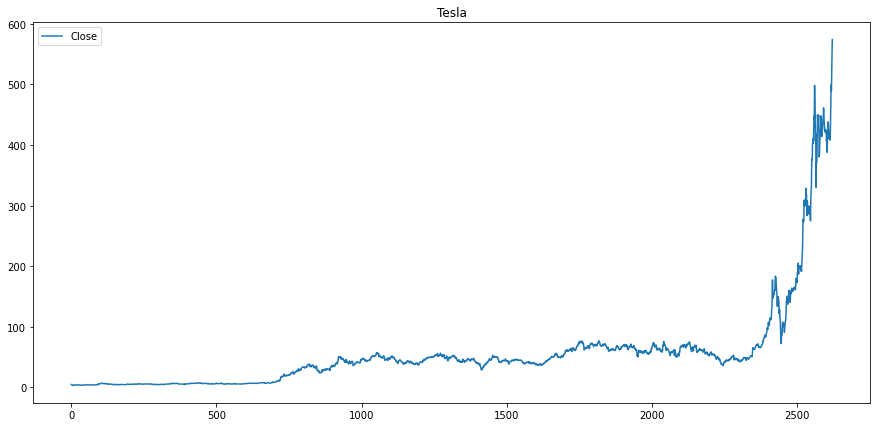

In [3]:
#Plot
df[['Close']].plot(figsize=(15,7))
plt.title("Tesla")
plt.show()

In [4]:
tesla_sg = pd.read_csv('Teslasgr.csv')

In [5]:
tesla_sg

,Date,Tesla Model S,Tesla Model X,Tesla Model 3,Range KM
0,2011,0,0,0,139
1,2012,2400,0,0,160
2,2013,19400,0,0,189
3,2014,16750,0,0,210
4,2015,26200,208,0,211
5,2016,30200,19600,0,233
6,2017,26500,21700,1770,267
7,2018,25745,26100,139782,304
8,2019,15090,19425,154840,336


Text(0, 0.5, 'Distance in KM')

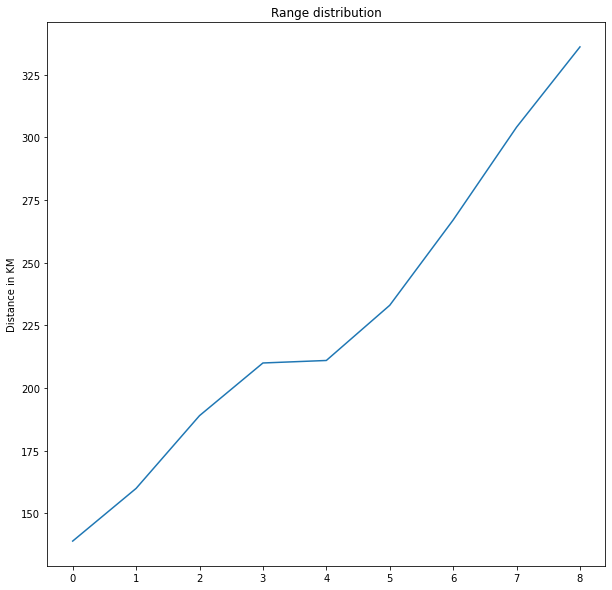

In [6]:
#Monthly prices of the three stocks together
tesla_sg['Range KM'].plot(title="Range distribution",figsize=(10,10))
plt.ylabel('Distance in KM')

Text(0, 0.5, 'Units')

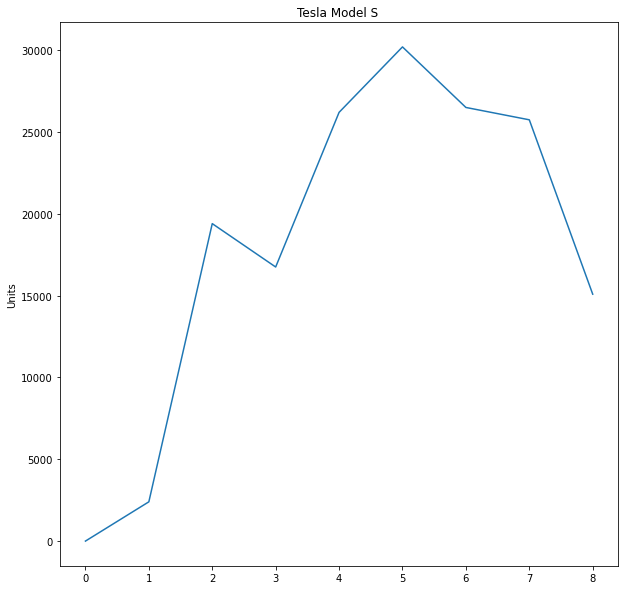

In [7]:
tesla_sg['Tesla Model S'].plot(title="Tesla Model S ",figsize=(10,10))
plt.ylabel('Units')

Text(0, 0.5, 'Units')

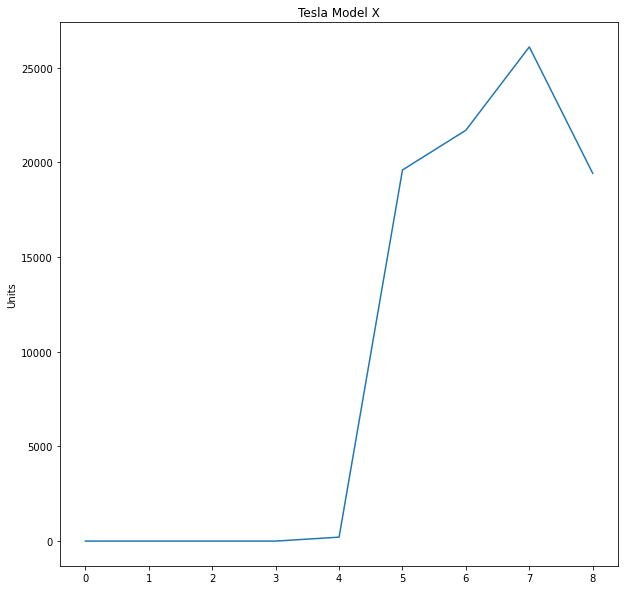

In [8]:
tesla_sg['Tesla Model X'].plot(title="Tesla Model X",figsize=(10,10))
plt.ylabel('Units')

Text(0, 0.5, 'Units')

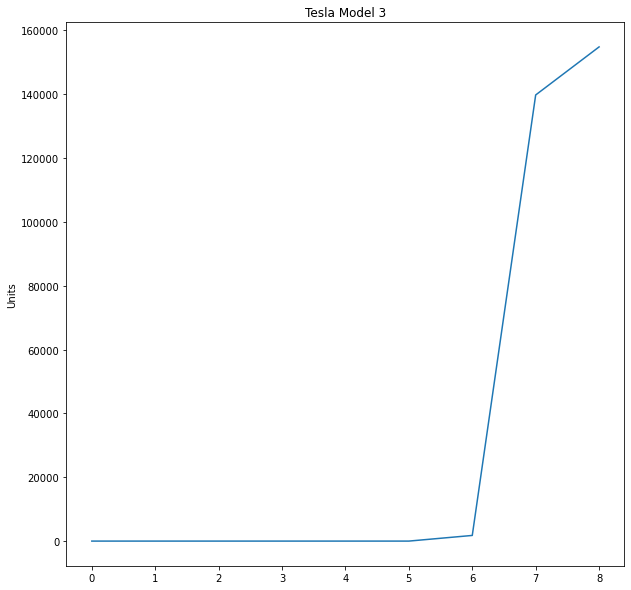

In [9]:
tesla_sg['Tesla Model 3'].plot(title="Tesla Model 3",figsize=(10,10))
plt.ylabel('Units')

What influences the sales of electric vehicle?

Is there a relationship between government benefit and sales of electric vehicle?

Is there a relationship between number of charging station and sales?



In [13]:
# about the data: data related to sales, laws and incentives and number of stations for the U.S. states


state = pd.read_csv('Book2_phyton.csv')                      
                       
#view first 5 rows of the data
state.head()

,State,Number_EletricStations_Total,EV_Laws_Incentives,EV_sales_2018,EV2018_market_share_w_in_state,EV_Registration_by_state
0,Alaska,25,1,155,0.0059,530
1,North Dakota,37,3,95,0.0024,170
2,South Dakota,45,2,135,0.0035,260
3,Wyoming,62,6,92,0.0035,170
4,Montana,64,5,274,0.0047,500


Lets begin veryfing if there is a relationship about government benefit and sales of electric vehicle?

Null hypothesis: There is no relationship between the number of laws incentives and sales of electric vehicle?

To answer this question we will analyse the relationship of number of laws incentives and sales of electric vehicle. We will use simple linear regression with:

y= sales of electric vehicle predictor= number of laws incentives

In [14]:
# It is being considered that the registration of electric vehicle represents the sales of electric vehicle
result = smf.ols(formula='EV_Registration_by_state ~ EV_Laws_Incentives', data=state).fit()    
print(result.summary()) 

                               OLS Regression Results                               
Dep. Variable:     EV_Registration_by_state   R-squared:                       0.839
Model:                                  OLS   Adj. R-squared:                  0.836
Method:                       Least Squares   F-statistic:                     255.7
Date:                      Sat, 05 Dec 2020   Prob (F-statistic):           4.41e-21
Time:                              00:11:58   Log-Likelihood:                -560.02
No. Observations:                        51   AIC:                             1124.
Df Residuals:                            49   BIC:                             1128.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Results:

p-value< 0.000 for the number of laws incentives, so we can reject the null hypothesis.

It indicates that number of laws incentives has a positive influence on the sales of electric vehicle. If the incentives  increases, it will contribute to increase the sales/registration of electric cars. An increase of 1 law that creates benefit contributes to increase 1961 units of electric vehicle. 

R-squared is 83.9% indicating that 83.9% of the variability in sales of eletric vehicle is explained by the government incentives using the linear model.

Lets continuing the analyse by veryfing if there is a relationship about number of electric stations and sales of electric vehicle?

Null hypothesis: There is no relationship between the number of electric stations and sales of electric vehicle?

To answer this question we will analyse the relationship of number of electric stations and sales of electric vehicle. We will use simple linear regression with:

y= sales of electric vehicle predictors= number of electric stations

In [15]:
# It is being considered that the registration of electric vehicle represents the sales of electric vehicle

result = smf.ols(formula='EV_Registration_by_state ~ Number_EletricStations_Total', data=state).fit()    
print(result.summary()) 

                               OLS Regression Results                               
Dep. Variable:     EV_Registration_by_state   R-squared:                       0.928
Model:                                  OLS   Adj. R-squared:                  0.927
Method:                       Least Squares   F-statistic:                     635.2
Date:                      Sat, 05 Dec 2020   Prob (F-statistic):           1.04e-29
Time:                              00:12:02   Log-Likelihood:                -539.39
No. Observations:                        51   AIC:                             1083.
Df Residuals:                            49   BIC:                             1087.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Results

p-value< 0.000 for the number of eletric stations, so we can reject the null hypothesis.

It indicates that number of eletric stations has a positive influence on the sales of electric vehicle. If the number of charging of electric vehicles increases, it will contribute to increase the sales/registration of electric cars. An increase of 1 additional charging station can contribute to increase the sales of electric vehicle by 31 units.

R-squared is 92.8% indicating that 92.8% of the variability in sales of eletric vehicle is explained by the number of charging stations using the linear model.

Next step, we will combine the two predictors above (number of governament incentives and number of charging stations). We will use multiple regression. 

y= sales of electric vehicle predictors= number of laws/incentives and number of electric stations


In [16]:
result = smf.ols(formula='EV_Registration_by_state ~ Number_EletricStations_Total + EV_Laws_Incentives', data=state).fit()    
print(result.summary()) 

                               OLS Regression Results                               
Dep. Variable:     EV_Registration_by_state   R-squared:                       0.936
Model:                                  OLS   Adj. R-squared:                  0.933
Method:                       Least Squares   F-statistic:                     351.9
Date:                      Sat, 05 Dec 2020   Prob (F-statistic):           2.11e-29
Time:                              00:12:07   Log-Likelihood:                -536.46
No. Observations:                        51   AIC:                             1079.
Df Residuals:                            48   BIC:                             1085.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Results

p-value< 0.000 for the number of eletric stations and p-value <0.025 for number of laws and incentives, so with 97.5% confidence level, we can reject the null hypothesis and conclude that both of the predictors have a significant influence on sales.

We verify that the multiple linear regression presented a higher R-squared (93.6%) than the simple linear regression for each predictors. This is a expected behaviour since we added one variable, R-squares increases. 

The coefficients indicates that for a given number of eletric vechicle stations, the additional of 1 law incentive leads to a increase in sales by approximately 463 units. Also, for a given number of government benefits, the additional of 1 number of electric station leads to a increase in sales by approximately 24 units.


Now we will analyse the demographic data related to people that bought eletric vehicle car in California

In [17]:

demo = pd.read_csv('Demo2.csv')                      
                       
#view first 5 rows of the data
demo

,Unnamed: 0,County,Lease_Purchase,Vehicle Category,Make,Purchase_Year,count,Age_Group,Age_Mean,Age_Mean2,Age_Upper,Gender,Income_Lower,Income_Mean,Income_Mean2,Income_Upper,Education,Education_Group,Housing_Type,Rent_Own
0,1,Los Angeles,Purchase,BEV,Nissan,2012,0,45-54,49.5,50,54,Male,75,87.0,87.0,100,Bachelor's degree,Bachelors degree,Detached House,Own
1,2,Sonoma,Purchase,BEV,Nissan,2012,0,45-54,49.5,50,54,Female,175,187.5,188.0,200,Graduate degree,Graduate degree,Detached House,Own
2,3,Santa Clara,Lease,BEV,Nissan,2012,0,45-54,49.5,50,54,Male,200,225.0,225.0,250,Graduate degree,Graduate degree,Detached House,Own
3,4,Orange,Lease,BEV,Nissan,2012,0,55-64,59.5,60,64,Male,200,225.0,225.0,250,Associates degree,Associates degree/Some college,Detached House,Own
4,5,San Mateo,Lease,BEV,Nissan,2012,0,25-34,29.5,30,34,Male,125,137.5,138.0,150,Bachelor's degree,Bachelors degree,Apartment/Condominium,Rent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,9044,San Joaquin,Lease,BEV,Chevrolet,2015,0,65+,70.0,70,70,Male,50,62.5,63.0,75,Bachelor's degree,Bachelors degree,Detached House,Own
8818,9046,Los Angeles,Lease,BEV,Chevrolet,2015,0,45-54,49.5,50,54,Male,75,87.0,87.0,100,"Some college, no degree",Associates degree/Some college,Detached House,Own
8819,9047,Orange,Purchase,BEV,Kia,2014,0,65+,70.0,70,70,Male,200,225.0,225.0,250,Bachelor's degree,Bachelors degree,Detached House,Own
8820,9048,Los Angeles,Lease,BEV,Mercedes-Benz,2015,0,35-44,39.5,40,44,Male,150,162.5,163.0,175,"Some college, no degree",Associates degree/Some college,Detached House,Own


In [18]:
demo.describe()

,Unnamed: 0,Purchase_Year,count,Age_Mean,Age_Mean2,Age_Upper,Income_Lower,Income_Mean,Income_Mean2,Income_Upper
count,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8822.000000,8711.000000,8711.000000,8822.000000
mean,4514.986964,2013.746203,0.256518,48.504761,48.945931,52.492632,189.873158,209.455229,209.715188,236.610179
std,2612.403090,0.800376,0.436736,12.078388,11.986129,11.257652,130.477022,149.702402,149.560956,173.285716
min,1.000000,2012.000000,0.000000,21.000000,21.000000,24.000000,1.000000,13.000000,13.000000,25.000000
25%,2249.250000,2013.000000,0.000000,39.500000,40.000000,44.000000,100.000000,112.500000,113.000000,125.000000
50%,4518.500000,2014.000000,0.000000,49.500000,50.000000,54.000000,150.000000,162.500000,163.000000,175.000000
75%,6777.750000,2014.000000,1.000000,59.500000,60.000000,64.000000,250.000000,275.000000,275.000000,300.000000
max,9049.000000,2015.000000,1.000000,70.000000,70.000000,70.000000,500.000000,600.000000,600.000000,700.000000


In [19]:
#Creating demo_tesla because we need to filter data on the analysis
demo_tesla=demo.loc[demo['Make']=='Tesla',:] 
demo_not_tesla=demo.loc[demo['Make']!='Tesla',:]
demo_tesla
#demo_not_tesla

,Unnamed: 0,County,Lease_Purchase,Vehicle Category,Make,Purchase_Year,count,Age_Group,Age_Mean,Age_Mean2,Age_Upper,Gender,Income_Lower,Income_Mean,Income_Mean2,Income_Upper,Education,Education_Group,Housing_Type,Rent_Own
11,12,Sacramento,Purchase,BEV,Tesla,2012,1,45-54,49.5,50,54,Male,150,112.5,113.0,125,Bachelor's degree,Bachelors degree,Detached House,Own
13,14,Los Angeles,Purchase,BEV,Tesla,2012,1,45-54,49.5,50,54,Male,500,600.0,600.0,700,Graduate degree,Graduate degree,Detached House,Own
39,40,San Diego,Purchase,BEV,Tesla,2012,1,55-64,59.5,60,64,Male,500,600.0,600.0,700,Bachelor's degree,Bachelors degree,Detached House,Own
42,43,Santa Clara,Purchase,BEV,Tesla,2012,1,65+,70.0,70,70,Male,150,112.5,113.0,125,Bachelor's degree,Bachelors degree,Detached House,Own
63,64,Los Angeles,Purchase,BEV,Tesla,2012,1,35-44,39.5,40,44,Male,300,325.0,325.0,350,Bachelor's degree,Bachelors degree,Detached House,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,9015,San Diego,Purchase,BEV,Tesla,2015,1,65+,70.0,70,70,Male,125,137.5,138.0,150,Graduate degree,Graduate degree,Detached House,Own
8794,9018,Los Angeles,Lease,BEV,Tesla,2015,1,45-54,49.5,50,54,Male,500,600.0,600.0,700,Graduate degree,Graduate degree,Detached House,Own
8800,9024,Contra Costa,Lease,BEV,Tesla,2015,1,55-64,59.5,60,64,Male,500,600.0,600.0,700,Graduate degree,Graduate degree,Detached House,Own
8802,9027,Napa,Lease,BEV,Tesla,2015,1,55-64,59.5,60,64,Male,300,325.0,325.0,350,Bachelor's degree,Bachelors degree,Detached House,Own


In [20]:
demo_tesla.describe()

,Unnamed: 0,Purchase_Year,count,Age_Mean,Age_Mean2,Age_Upper,Income_Lower,Income_Mean,Income_Mean2,Income_Upper
count,2263.000000,2263.000000,2263.0,2263.000000,2263.000000,2263.000000,2263.000000,2195.000000,2195.000000,2263.000000
mean,3997.132125,2013.532479,1.0,52.696421,53.095890,56.299602,293.872735,329.650797,329.791800,374.911622
std,2754.762507,0.773501,0.0,11.872526,11.732281,10.654465,152.702263,186.405401,186.262635,218.214797
min,12.000000,2012.000000,1.0,21.000000,21.000000,24.000000,1.000000,13.000000,13.000000,25.000000
25%,1319.500000,2013.000000,1.0,39.500000,40.000000,44.000000,175.000000,162.500000,163.000000,200.000000
50%,3782.000000,2013.000000,1.0,49.500000,50.000000,54.000000,250.000000,275.000000,275.000000,300.000000
75%,6541.500000,2014.000000,1.0,59.500000,60.000000,64.000000,500.000000,600.000000,600.000000,700.000000
max,9037.000000,2015.000000,1.0,70.000000,70.000000,70.000000,500.000000,600.000000,600.000000,700.000000


In [21]:
# Data from 2012-2015

# % of Male that bought EV cars in the sample

count_male = demo.loc[demo['Gender'] == 'Male', 'Unnamed: 0']
perc_male = count_male.count()/len(demo)*100
print("Percentage of Male that bought EV car: ", perc_male, "%") 

Percentage of Male that bought EV car:  77.5334391294491 %


In [22]:
# % of purchase related to EV cars in the sample

count_purchase = demo.loc[demo['Lease_Purchase'] == 'Purchase', 'count']
perc_purchase = count_purchase.count()/len(demo)*100
print("Percentage of Purchase- EV car: ", perc_purchase , "%") 

Percentage of Purchase- EV car:  37.39514849240535 %


In [23]:
# Looking Tesla data, % of Male that bought Tesla cars (looking just people that bought Tesla)
 
count_tesla_male = demo_tesla.loc[demo_tesla['Gender'] == 'Male', 'count']
perc_tesla_male = count_tesla_male.count()/len(demo_tesla)*100
print("Percentage of Male that bought Tesla car: ", perc_tesla_male , "%")    

Percentage of Male that bought Tesla car:  83.60583296509058 %


In [24]:
# Looking Tesla data, % of people that bought Tesla cars instead of lease it (looking just people that bought Tesla)
 
count_tesla_purchase = demo_tesla.loc[demo_tesla['Lease_Purchase'] == 'Purchase', 'count']
perc_tesla_purchase = count_tesla_purchase.count()/len(demo_tesla)*100
print("Percentage of Purchase- Tesla car: ", perc_tesla_purchase , "%")

Percentage of Purchase- Tesla car:  95.13919575784358 %


Looking the data we verified that mens buys more electric vehicle than womens in California. For eletric vehicle that are not Tesla, people tend to lease it. For Tesla, we verified that males correspond to 95% of the buyings and they prefer purchase than lease it. 

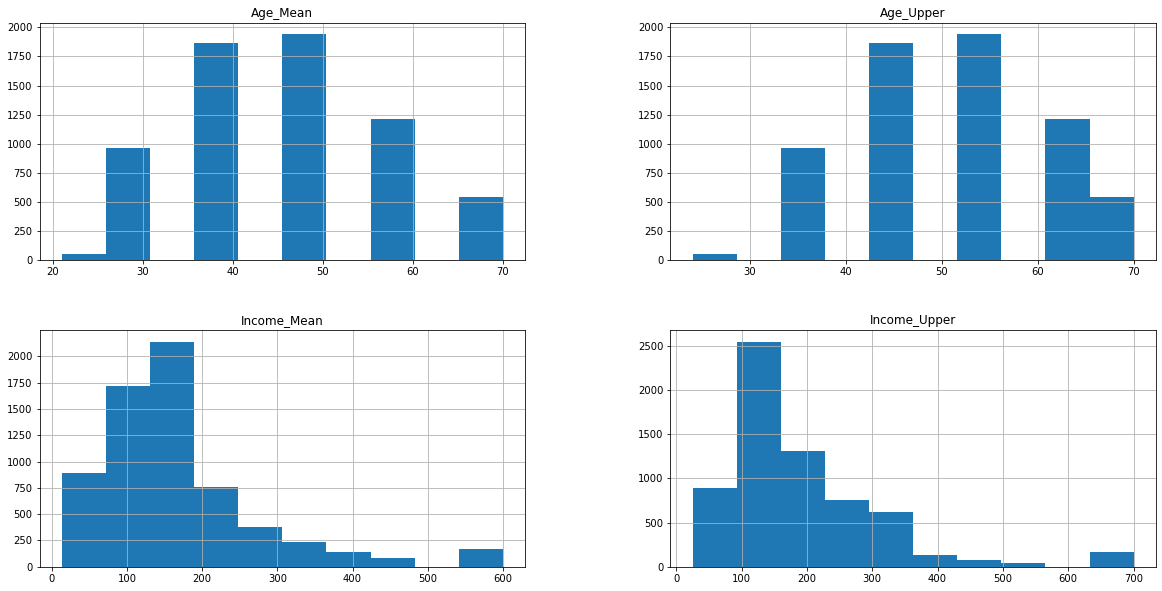

In [25]:
# construct the histogram for the predictors.

#looking age and income associate with people that bought a electric vehicle different than Tesla
demo_not_tesla[['Age_Upper','Income_Upper','Age_Mean','Income_Mean']].hist(figsize=(20,10))
plt.show()


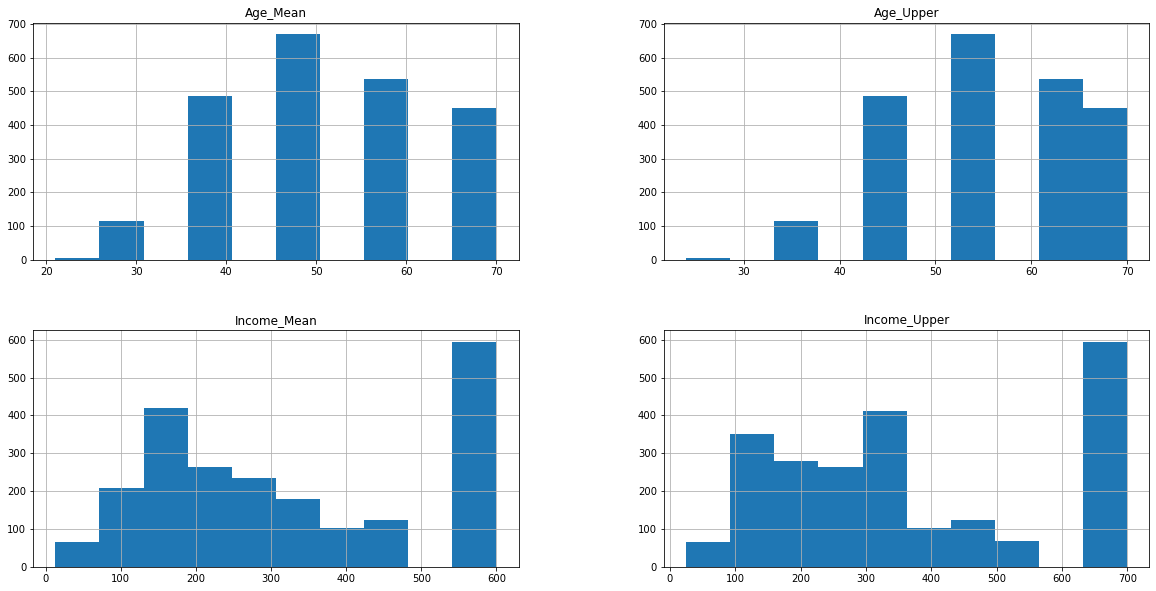

In [26]:
#looking age and income associate with people that bought Tesla car
demo_tesla[['Age_Upper','Income_Upper','Age_Mean','Income_Mean']].hist(figsize=(20,10))
plt.show()

We could verify from the plots above and looking the statistics of the sample that people that bought tesla car have higher income comparing with people that bought other electric vehicle. 


The following analysis is looking to obtain information about the consumer of Tesla vehicle. 

About the data: demographic data of electric vehicle consumer in California.

The information available is related to the age, gender, income, if they lease or purchased the vehicle, their education level, their housing type and if they rent or own their house.

In this analysis we would have 11 predictors and before running the logistic regression we decided to apply Lasso to check if we need to consider all those variables. If some variables are not contributing to our model, we can improve prediction accuracy and model interpretability by removing it from the model. 

In [27]:
# creating the dummy variable

# creating dummy variable for purchase_lease
demo['purchase_dummy']=demo['Lease_Purchase'].apply(lambda x: 1 if x=='Purchase' else 0)

# creating dummy variable for gender
demo['male_dummy']=demo['Gender'].apply(lambda x: 1 if x=='Male' else 0)

# creating dummy variable for education
demo['bachelor_dummy']=demo['Education_Group'].apply(lambda x: 1 if x=='Bachelors degree' else 0)
demo['graduate_dummy']=demo['Education_Group'].apply(lambda x: 1 if x=='Graduate degree' else 0)
demo['associate_some_collegue_dummy']=demo['Education_Group'].apply(lambda x: 1 if x=='Associates degree/Some college' else 0)


# creating dummy variable for housing
demo['Detached_House_dummy']=demo['Housing_Type'].apply(lambda x: 1 if x=='Detached House' else 0)
demo['Apartment_Condominium_dummy']=demo['Housing_Type'].apply(lambda x: 1 if x=='Apartment/Condominium' else 0)
demo['Attached_house_dummy']=demo['Housing_Type'].apply(lambda x: 1 if x=='Attached_house_townhome_duplex_triplex' else 0)


# creating dummy variable for rent/own house
demo['Rent_dummy']=demo['Rent_Own'].apply(lambda x: 1 if x=='Rent' else 0)

# creating dummy variable for Tesla
demo['Tesla_yes_dummy']=demo['Make'].apply(lambda x: 1 if x=='Tesla' else 0)
demo

,Unnamed: 0,County,Lease_Purchase,Vehicle Category,Make,Purchase_Year,count,Age_Group,Age_Mean,Age_Mean2,...,purchase_dummy,male_dummy,bachelor_dummy,graduate_dummy,associate_some_collegue_dummy,Detached_House_dummy,Apartment_Condominium_dummy,Attached_house_dummy,Rent_dummy,Tesla_yes_dummy
0,1,Los Angeles,Purchase,BEV,Nissan,2012,0,45-54,49.5,50,...,1,1,1,0,0,1,0,0,0,0
1,2,Sonoma,Purchase,BEV,Nissan,2012,0,45-54,49.5,50,...,1,0,0,1,0,1,0,0,0,0
2,3,Santa Clara,Lease,BEV,Nissan,2012,0,45-54,49.5,50,...,0,1,0,1,0,1,0,0,0,0
3,4,Orange,Lease,BEV,Nissan,2012,0,55-64,59.5,60,...,0,1,0,0,1,1,0,0,0,0
4,5,San Mateo,Lease,BEV,Nissan,2012,0,25-34,29.5,30,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,9044,San Joaquin,Lease,BEV,Chevrolet,2015,0,65+,70.0,70,...,0,1,1,0,0,1,0,0,0,0
8818,9046,Los Angeles,Lease,BEV,Chevrolet,2015,0,45-54,49.5,50,...,0,1,0,0,1,1,0,0,0,0
8819,9047,Orange,Purchase,BEV,Kia,2014,0,65+,70.0,70,...,1,1,1,0,0,1,0,0,0,0
8820,9048,Los Angeles,Lease,BEV,Mercedes-Benz,2015,0,35-44,39.5,40,...,0,1,0,0,1,1,0,0,0,0


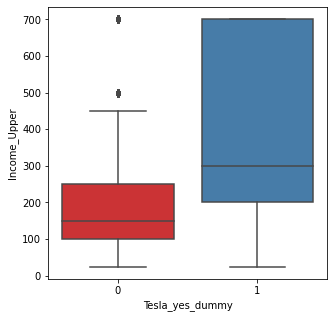

In [28]:
# ploting income for telsa consumer and other eletric vehicle consumer. 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))

ax = sns.boxplot(x="Tesla_yes_dummy", y="Income_Upper", data=demo, palette="Set1") 

# Tesla:1  Other:0

In [29]:
y = demo.Tesla_yes_dummy # what we want to predict

X = demo[["Age_Upper","Income_Upper","male_dummy","purchase_dummy","bachelor_dummy","graduate_dummy","associate_some_collegue_dummy","Detached_House_dummy","Apartment_Condominium_dummy","Attached_house_dummy","Rent_dummy"]]
#X = demo[["Age_Upper","Income_Upper","male_dummy","purchase_dummy"]]

In [30]:
# Creating the Tuning Paramter (C=1/λ)
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)
cs

array([5.12131106e-06, 1.49984998e-05, 4.39252749e-05, 1.28641518e-04,
       3.76745281e-04, 1.10335302e-03, 3.23132882e-03, 9.46341360e-03,
       2.77149748e-02, 8.11673103e-02, 2.37710202e-01, 6.96168691e-01,
       2.03883065e+00, 5.97101031e+00, 1.74869669e+01, 5.12131106e+01])

In [31]:
#Associating each C to a Lasso coefficient
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
y_pred=clf.predict(X)
y_pred_proba=clf.predict_proba(X)
clf.score(X, y)


C:\Users\akint\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akint\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8856268419859442

In [32]:
y_pred_proba

array([[0.57552631, 0.42447369],
       [0.55873229, 0.44126771],
       [0.96586855, 0.03413145],
       ...,
       [0.25388835, 0.74611165],
       [0.98289558, 0.01710442],
       [0.97136715, 0.02863285]])

In [33]:
np.shape(clf.coef_)
clf.coef_

array([[ 0.03388233,  0.00560199,  0.29589901,  3.68278819,  0.09072388,
        -0.10515977, -0.05454509, -0.03893294,  0.15370972, -0.13537353,
         0.03847332]])

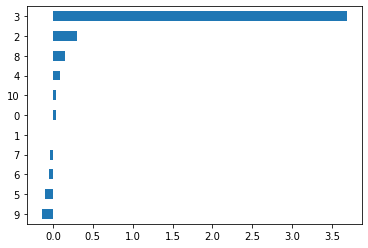

In [34]:
coefs1 = clf.coef_
coefs1_series = pd.Series(coefs1.ravel())
coefs1_series.sort_values().plot(kind="barh")

In [35]:
coefs1_series

0     0.033882
1     0.005602
2     0.295899
3     3.682788
4     0.090724
5    -0.105160
6    -0.054545
7    -0.038933
8     0.153710
9    -0.135374
10    0.038473
dtype: float64

Results:
Since none of the coeficients resulted from Lasso model were zero, we will perform the logistic regression with all the 11 predictors.

The objective of the logistic regression is to verify whether an individual that buys electric vehicle will buy a Tesla car or not. 

Null hypothesis: probability of buying a Tesla car does not depend on the predictors. 

In [36]:
#Using variables to determine which of the predictors influence the probability to buy a Tesla car


X1= demo[["Age_Upper","Income_Upper","male_dummy","purchase_dummy","bachelor_dummy","graduate_dummy","associate_some_collegue_dummy","Detached_House_dummy","Apartment_Condominium_dummy","Attached_house_dummy","Rent_dummy"]]

X1 = sm.add_constant(X1) ##  ## let's add an intercept (beta_0) to our model
y = demo["Tesla_yes_dummy"].values.reshape(-1,1)

model = sm.Logit(y, X1).fit() 

# Print out the statistics 
model.summary()


Optimization terminated successfully.
         Current function value: 0.250041
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8822
Model:                          Logit   Df Residuals:                     8810
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.5609
Time:                        00:12:38   Log-Likelihood:                -2205.9
converged:                       True   LL-Null:                       -5023.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -7.3824      0.594    -12.424      0.000      -8.547      -6.218
Age_Upper                         0.0354      0.004      9.887      0.000       0.028       0.042
Income_Upper                      0.0061      0.000     23.830      0.000       0.006       0.007
male_dummy                        0.3724      0.095      3.919      0.000       0.186       0.559
purchase_dummy                    4.4961      0.115     39.092      0.000       4.271       4.722
bachelor_dummy                   -0.0909      0.297     -0.306      0.760      -0.674       0.492
graduate_dummy                   -0.3100      0.295     -1.049      0.294      -0.889       0.269
associate_some_collegue_dummy    -0.2392      0.310     -0.771      0.441      -0.848       0.369
Detached_House_dummy             -0.1507      0.466     -0.323      0.746      -1.064       0.763
Apartment_Condominium_dummy       0.1132      0.494      0.229      0.819      -0.856       1.082
Attached_house_dummy             -0.3051      0.487     -0.626      0.531      -1.260       0.650
Rent_dummy                        0.1244      0.154      0.809      0.419      -0.177       0.426
=================================================================================================
"""

Results: 

We verified that Age, income, male, purchase have p-value <0.025, so we can reject the null hypothesis. Another evidence against the null hypothesis is the large value of z-statistics. Age and income have positive coeficients indicating that an increase in those variable increases the probability to buy a Tesla car. Also,if the person is male and is purchasing the car, increases the probability to buy a Tesla car, since they have positive coefficients.We conclude there is a string association between Age, income, male, purchase and the probability to buy a Tesla car. 

If we consider 97.5% confidence level the variables bachelor_dummy, graduate_dummy,associate_some_collegue_dummy,detached_house_dummy, apartment_condominium_dummy,attahced_house_dummy and rent_dummy have p-value greater than 0.025, so these variables statistically does not have a strong influence on the probability to buy a Tesla car.


In [37]:
y_pred = model.predict(X1)
y_pred.describe()
y_pred.shape
type(y_pred)
y_pred

0       0.442525
1       0.448205
2       0.017562
3       0.026603
4       0.008673
          ...   
8817    0.013193
8818    0.007575
8819    0.778484
8820    0.008425
8821    0.013588
Length: 8822, dtype: float64

In [38]:
#The following command transforms all the elements with predicted probabilities of buying a Tesla car greater than 0.5 to Yes=1

y_pred2 = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
y_pred2.head()

y_pred2.describe()

y_pred3 = y_pred2.values.reshape(-1,1)  # change to array 

# Use  confusion matrix to measure the accuracy of our model.

confusion_matrix(y, y_pred2)

array([[5946,  613],
       [ 406, 1857]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

#Accuracy of the model - Overall fraction of correct predictions
accuracy_score=accuracy_score(y, y_pred3)
print ('accuracy = {0}%'.format(accuracy_score*100)  )

# Recall
from sklearn.metrics import recall_score
recall=recall_score(y, y_pred3, average='binary')
print ('recall= {0}%'.format(recall*100)  )

# Precision
from sklearn.metrics import precision_score
precision=precision_score(y, y_pred3, average='binary')
print ('precision= {0}%'.format(precision*100))

accuracy = 88.44933121741101%
recall= 82.05921343349536%
precision= 75.18218623481782%


In [40]:
# F-Measure
F_Measure = 2 * (precision * recall) / (precision + recall)
print ('F_Measure= {0}%'.format(F_Measure*100)  )

F_Measure= 78.47031481090218%


In [41]:
#Specificity or True Negative Rate (TNR)=TN/(TN+FP)
CM=confusion_matrix(y, y_pred2)

specificity=CM[0,0]/(CM[0,0]+CM[0,1])
print ('specificity= {0}%'.format(specificity*100)  )
#FPR=1-specificity

FPR=1-specificity
print ('FPR= {0}%'.format(FPR*100)  )

specificity= 90.65406311937795%
FPR= 9.345936880622041%


Logistic: ROC AUC=0.864


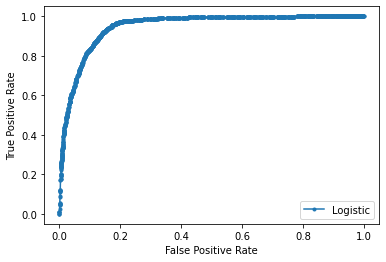

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
lr_auc = roc_auc_score(y, y_pred2)

# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves


lr_fpr, lr_tpr, thresholds = roc_curve(y,  y_pred)
# plot the roc curve for the model

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

For this data the AUC is 0.86, which is close to the maximum of 1, so it is a very good result since they are considering all possible thresholds. 

In order to better verify the accuracy of the logistic regression model, we will fit the model using part of the data and then observe how well it predicts the data.

In [43]:

X= demo[["Age_Upper","Income_Upper","male_dummy","purchase_dummy","bachelor_dummy","graduate_dummy","associate_some_collegue_dummy","Detached_House_dummy","Apartment_Condominium_dummy","Attached_house_dummy","Rent_dummy"]]

y = demo["Tesla_yes_dummy"].values.reshape(-1,1)

X = sm.add_constant(X)

#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
X.shape

(8822, 12)

In [44]:
##See the size of the training sample
x_train.shape

(6616, 12)

In [45]:
##See the size of the test sample
x_test.shape

(2206, 12)

In [46]:
# Perfoming Logistic Regression model for the training data

# Note the difference in argument order
model = sm.Logit(y_train, x_train).fit() 

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.246740
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6616
Model:                          Logit   Df Residuals:                     6604
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.5635
Time:                        00:12:55   Log-Likelihood:                -1632.4
converged:                       True   LL-Null:                       -3740.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.9755      0.737     -9.470      0.000      -8.419      -5.532
Age_Upper                         0.0332      0.004      7.999      0.000       0.025       0.041
Income_Upper                      0.0062      0.000     20.536      0.000       0.006       0.007
male_dummy                        0.3240      0.111      2.930      0.003       0.107       0.541
purchase_dummy                    4.5703      0.138     33.142      0.000       4.300       4.841
bachelor_dummy                   -0.1869      0.349     -0.536      0.592      -0.871       0.497
graduate_dummy                   -0.3766      0.347     -1.086      0.278      -1.056       0.303
associate_some_collegue_dummy    -0.3964      0.363     -1.092      0.275      -1.108       0.315
Detached_House_dummy             -0.4218      0.594     -0.710      0.478      -1.586       0.743
Apartment_Condominium_dummy      -0.2065      0.624     -0.331      0.741      -1.430       1.017
Attached_house_dummy             -0.5192      0.615     -0.844      0.399      -1.725       0.687
Rent_dummy                       -0.0053      0.177     -0.030      0.976      -0.353       0.342
=================================================================================================
"""

Results: 

We verified that Age, income, male, purchase have p-value <0.025, so we can reject the null hypothesis. Another evidence against the null hypothesis is the large value of z-statistics. Age and income have positive coeficients indicating that an increase in those variable increases the probability to buy a Tesla car. Also,if the person is male and is purchasing the car, increases the probability to buy a Tesla car, since they have positive coefficients.We conclude there is a string association between Age, income, male, purchase and the probability to buy a Tesla car. 

If we consider 97.5% confidence level the variables bachelor_dummy, graduate_dummy,associate_some_collegue_dummy,detached_house_dummy, apartment_condominium_dummy,attahced_house_dummy and rent_dummy have p-value greater than 0.025, so these variables statistically does not have a strong influence on the probability to buy a Tesla car.


In [47]:
y_pred_split = model.predict(x_test)   
y_pred_split.describe()
y_pred_split.shape
type(y_pred_split)
y_pred_split

1729    0.011734
7462    0.619891
5343    0.885518
4468    0.461572
229     0.673085
          ...   
5953    0.919421
8076    0.012686
4841    0.002858
654     0.292175
3178    0.007388
Length: 2206, dtype: float64

In [48]:
## Calibrate first computing the prob and then assigning 1 or 0 using a chosen cut-off value

y_pred2_split = y_pred_split.apply(lambda x: 1 if x > 0.5 else 0)
y_pred2_split.head()

y_pred2_split.describe()

y_pred3_split = y_pred2_split.values.reshape(-1,1)  # change to array 

confusion_matrix(y_test, y_pred3_split)

array([[1470,  145],
       [ 114,  477]], dtype=int64)

In [49]:

from sklearn.metrics import accuracy_score

#Accuracy of the model - Overall fraction of correct predictions
accuracy_score=accuracy_score(y_test, y_pred3_split)
print ('accuracy = {0}%'.format(accuracy_score*100)  )

# Recall
from sklearn.metrics import recall_score
recall2=recall_score(y_test, y_pred3_split, average='binary')
print ('recall= {0}%'.format(recall2*100)  )

# Precision
from sklearn.metrics import precision_score
precision2=precision_score(y_test, y_pred3_split, average='binary')
print ('precision= {0}%'.format(precision2*100))

accuracy = 88.25929283771532%
recall= 80.71065989847716%
precision= 76.68810289389067%


In [50]:
   # F-Measure
F_Measure2 = 2 * (precision2 * recall2) / (precision2 + recall2)
print ('F_Measure= {0}%'.format(F_Measure2*100)  )

F_Measure= 78.6479802143446%


In [51]:
#Specificity or True Negative Rate (TNR)=TN/(TN+FP)

CM2=confusion_matrix(y_test, y_pred3_split)

specificity2=CM2[0,0]/(CM2[0,0]+CM2[0,1])
print ('specificity= {0}%'.format(specificity2*100)  )

#FPR=1-specificity
FPR2=1-specificity2
print ('FPR= {0}%'.format(FPR2*100)  )

specificity= 91.02167182662538%
FPR= 8.978328173374617%


Logistic: ROC AUC=0.859


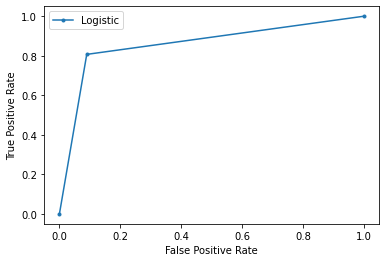

In [52]:
# calculate scores
lr_auc_split = roc_auc_score(y_test,  y_pred3_split)

# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc_split))
# calculate roc curves


lr_fpr_split, lr_tpr_split, thresholds = roc_curve(y_test,  y_pred3_split)
# plot the roc curve for the model

pyplot.plot(lr_fpr_split, lr_tpr_split, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Analyzing the results of the model considering the whole data and the split data (train and test data) we conclude that the model predicts well since both of them presented very similar results and the model that we applied the test data, presented a good prediction capacity. 

whole data
accuracy = 88.44933121741101%
recall= 82.05921343349536%
precision= 75.18218623481782%
F_Measure= 78.47031481090218%
specificity= 90.65406311937795%
FPR= 9.345936880622041%
ROC AUC=0.864

split data

accuracy = 88.25929283771532%
recall= 80.71065989847716%
precision= 76.68810289389067%
F_Measure= 78.6479802143446%
specificity= 91.02167182662538%
FPR= 8.978328173374617%
ROC AUC=0.859


# TESLA STOCK FORECASTING

In [27]:
df=pd.read_csv('TSLA.csv')



In [49]:

print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
(2623, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


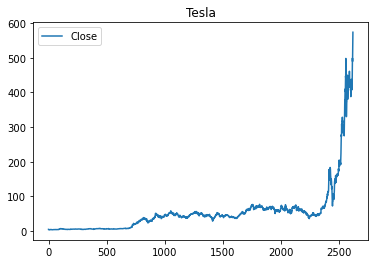

In [50]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

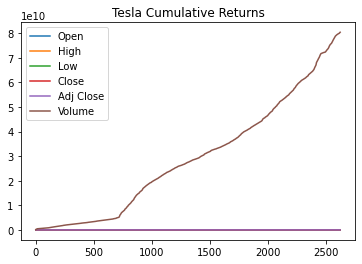

In [51]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

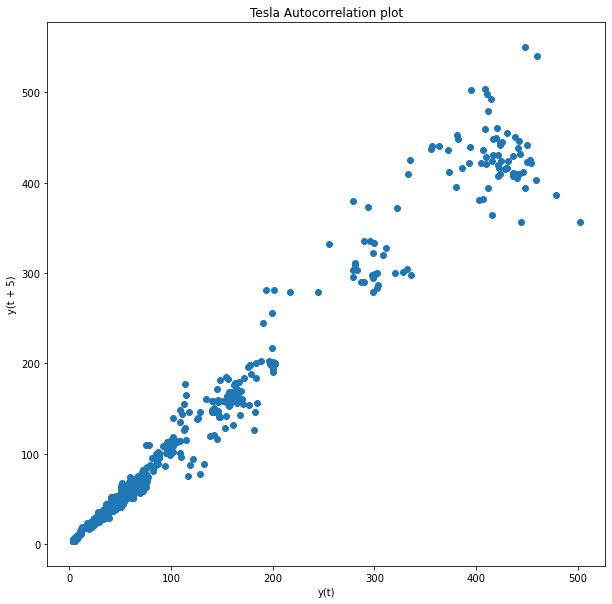

In [52]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

# 1. ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

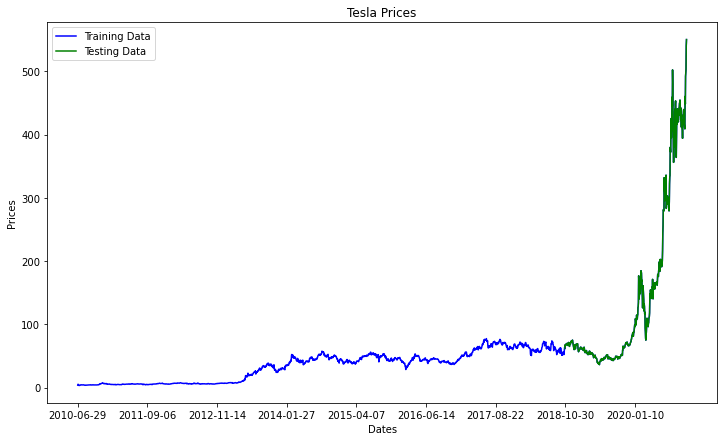

In [53]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2622, 300), df['Date'][0:2622:300])
plt.legend()

In [54]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [55]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

In [56]:
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 119.900
Symmetric mean absolute percentage error: 73.286


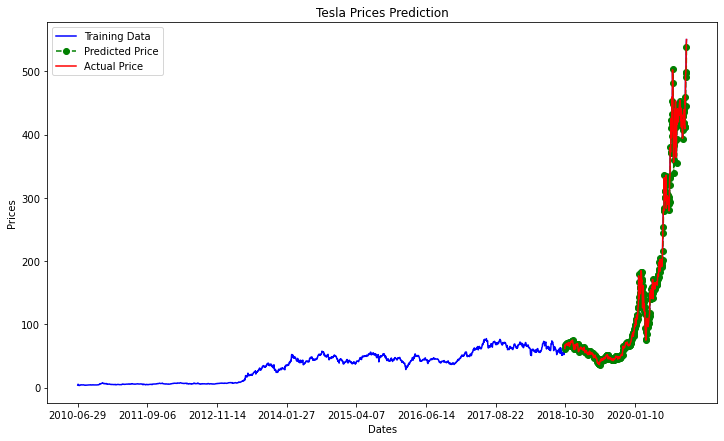

In [57]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2622, 300), df['Date'][0:2622:300])
plt.legend()

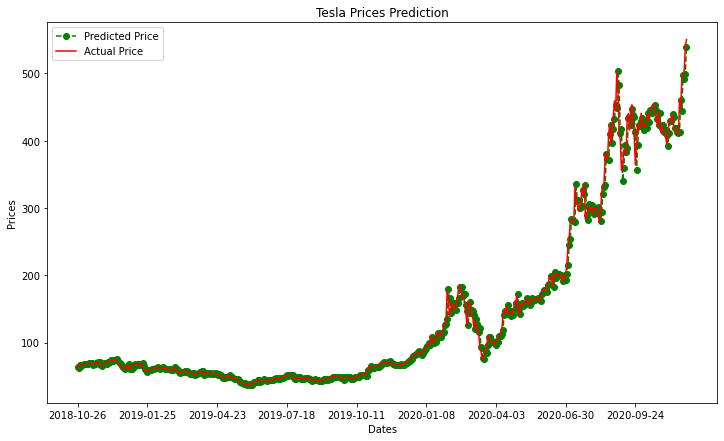

In [58]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(2098,2622, 60), df['Date'][2098:2622:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# 2. Deep Learning

In [28]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Future

In [30]:
# create a new data frame with only 'Close column'
data = df.filter(['Open'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

2099

In [31]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00104603],
       [0.00352942],
       [0.00324048],
       ...,
       [0.91485502],
       [0.98233466],
       [1.        ]])

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [33]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.04602511e-03, 3.52942038e-03, 3.24048338e-03, 2.50899729e-03,
       1.41176815e-03, 9.50931917e-05, 0.00000000e+00, 5.26669985e-04,
       6.61994911e-04, 4.57178806e-04, 6.58337481e-04, 1.38982357e-03,
       1.66778828e-03, 1.91283612e-03, 2.08839279e-03, 1.65315856e-03,
       1.59463968e-03, 1.84700238e-03, 1.96038272e-03, 1.74459432e-03,
       1.61292683e-03, 1.69339030e-03, 1.48491676e-03, 1.59463968e-03,
       1.77751120e-03, 2.12496709e-03, 1.97501244e-03, 1.44834246e-03,
       1.37519385e-03, 1.28375809e-03, 9.32644765e-04, 6.07133455e-04,
       7.46115812e-04, 8.44866434e-04, 1.03139539e-03, 1.26181350e-03,
       8.77783308e-04, 9.18015043e-04, 1.07894198e-03, 1.13746087e-03,
       1.10454400e-03, 1.37153642e-03, 1.32033239e-03, 1.30204524e-03,
       1.28741552e-03, 1.27278580e-03, 1.54709308e-03, 1.72996460e-03,
       1.63487141e-03, 1.65315856e-03, 1.77751120e-03, 1.68607544e-03,
       1.73727946e-03, 1.60926940e-03, 1.77019634e-03, 2.19811570e-03,
     

In [34]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [35]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2039, 60, 1)

In [36]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [37]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
#Train the model
model.fit(x_train,y_train, batch_size=10, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
2039/2039 [==============================] - 49s 24ms/step - loss: 1.5095e-04
Epoch 2/10
2039/2039 [==============================] - 44s 22ms/step - loss: 2.6288e-05
Epoch 3/10
2039/2039 [==============================] - 42s 21ms/step - loss: 2.0440e-05
Epoch 4/10
2039/2039 [==============================] - 50s 25ms/step - loss: 2.1415e-05
Epoch 5/10
2039/2039 [==============================] - 64s 31ms/step - loss: 2.1241e-05
Epoch 6/10
2039/2039 [==============================] - 54s 26ms/step - loss: 1.9167e-05
Epoch 7/10
2039/2039 [==============================] - 65s 32ms/step - loss: 1.5082e-05
Epoch 8/10
2039/2039 [==============================] - 50s 25ms/step - loss: 1.8195e-05
Epoch 9/10
2039/2039 [==============================] - 44s 21ms/step - loss: 1.2145e-05
Epoch 10/10
2039/2039 [==============================] - 45s 22ms/step - loss: 1.2476e-05


In [39]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [40]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [41]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(524, 60, 1)

In [42]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
np.mean(predictions - y_test)**2

67.94493597027282

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


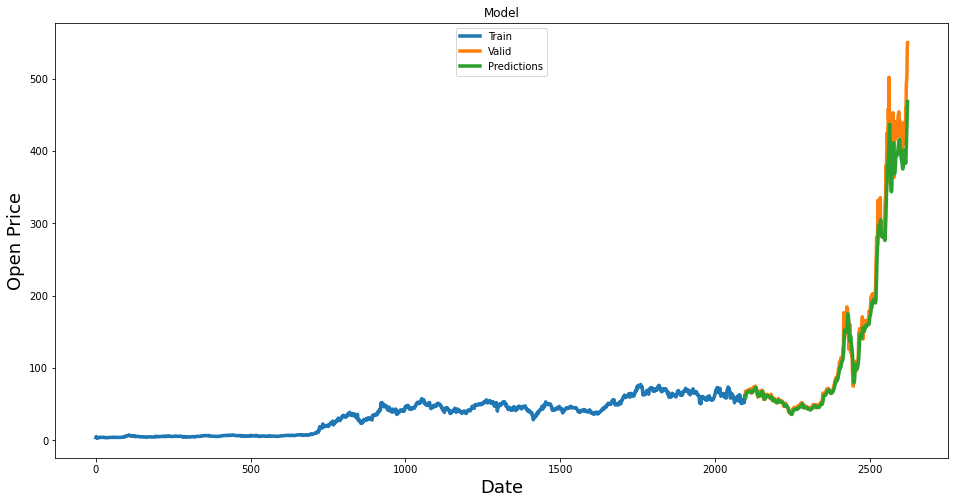

In [44]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3.5)
plt.plot(valid[['Open','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')

# 3. FB PROPHET

In [45]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [48]:
df=pd.read_csv('TSLA.csv')



In [49]:
df1 = df[['Date','Close']]

In [50]:
df1.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [52]:
df1.rename(columns={'Date':'ds','Close':'y'},inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
dfwmt = df1[0:]
m = Prophet()
m.fit(dfwmt)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
future1 = m.make_future_dataframe(periods=270)
future1.tail()

,ds
2888,2021-08-18
2889,2021-08-19
2890,2021-08-20
2891,2021-08-21
2892,2021-08-22


In [55]:
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-06-29,-1.328114,-47.567197,46.307414
1,2010-06-30,-0.540227,-42.971511,47.354997
2,2010-07-01,-0.517865,-46.437579,43.635397
3,2010-07-02,-0.656819,-47.851795,44.655624
4,2010-07-06,1.539728,-43.881169,47.885749


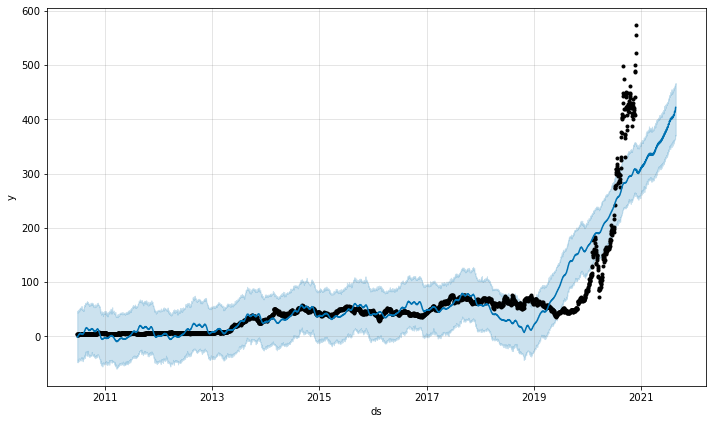

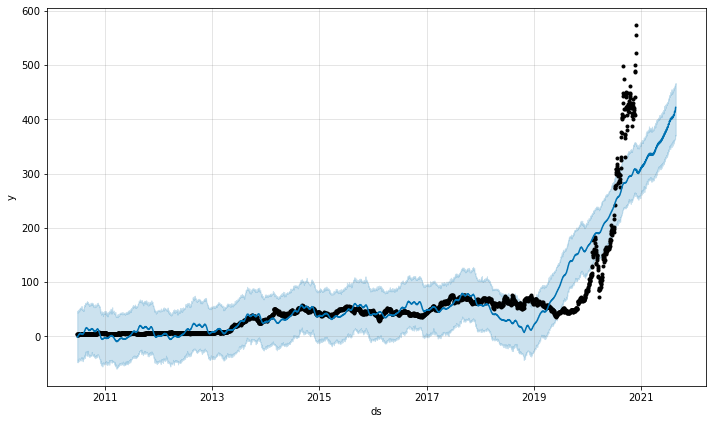

In [56]:
m.plot(forecast1)

In [57]:
ll = []
for i in df1['ds']:
    ll.append(str(i))
    
df1['strdate'] = ll

df1['strdate'] = df1['strdate'].str.replace(' 00:00:00','')

ll1 = []
for i in forecast1['ds']:
    ll1.append(str(i))
    
forecast1['strdate'] = ll1

forecast1['strdate'] = forecast1['strdate'].str.replace(' 00:00:00','')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [58]:
df1_f = pd.merge(df1, forecast1[['strdate', 'yhat', 'yhat_lower', 'yhat_upper']], on='strdate')
df1_f = df1_f.set_index('ds')
df1_f.head()

,y,strdate,yhat,yhat_lower,yhat_upper
ds,,,,,
2010-06-29,4.778,2010-06-29,-1.328114,-47.567197,46.307414
2010-06-30,4.766,2010-06-30,-0.540227,-42.971511,47.354997
2010-07-01,4.392,2010-07-01,-0.517865,-46.437579,43.635397
2010-07-02,3.840,2010-07-02,-0.656819,-47.851795,44.655624
2010-07-06,3.222,2010-07-06,1.539728,-43.881169,47.885749


In [59]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,20), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

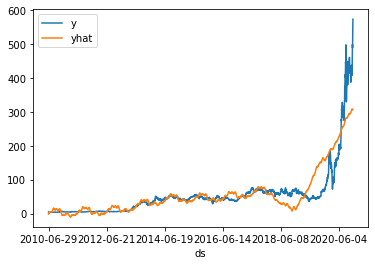

<Figure size 1440x1440 with 0 Axes>

In [60]:
plt.figure(figsize=(20,20))
df1_f.loc[:,["y", "yhat"]].plot()
plt.figure(figsize=(20,20))

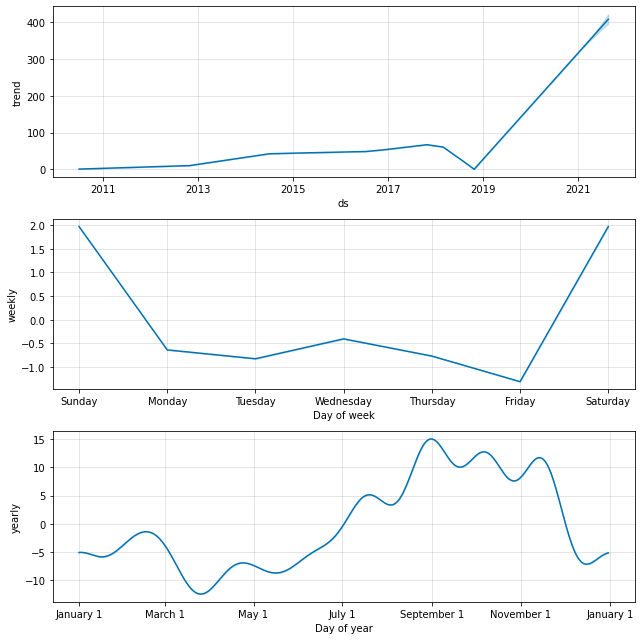

In [61]:
fig1 = m.plot_components(forecast1)


Data Sources:

Transportation Research Center at Argonne National Laboratory, anl.gov/es/light-duty-electric-drive-vehicles-monthly-sales-updates

U.S.Department of Energy: Alternative Fuels Data Center
afdc.energy.gov/data

Center for Sustainable Energy (2019). California Air Resources Board Clean Vehicle Rebate Project, EV Consumer Survey Dataset. Retrieved [date retrieved] from http://cleanvehiclerebate.org/eng/survey-dashboard/ev

Yahoo Finance for Tesla Stock

Statistica
